# Example: Digital Control in the State-Space

A system in state-space representation

$$
    \dot{x}(t) = A x(t) + B u(t) \quad \text{with} \quad x(t_{0}) = x_{0}
$$

is solved via integration in time as

$$
    x(t) = \exp \left( A(t - t_{0}) \right) x(t_{0}) + \int\limits_{t_{0}}^{t} \exp \left( A(t - \tau) \right) B ~ u(\tau) d\tau \text{.}
$$

This solution in time is used to derive the discrete state-space representation. If the $x(t)$ is solved iteratively only in the time interval $ t \in \left\{ t_{0} + i~\Delta T  , t_{0} + (i+1)~\Delta T \right\} $ for an increasing $ i \in \left\{ 0, 1, 2, \cdots, N-1 \right\} $ than the solution is found from $ t_{0} $ until $ t_{final} = N ~ \Delta T $. This incremental solution is expressed by the difference equation 

$$
    x(t_{n+1}) = \exp \left( A \Delta T \right) x(t_{n}) + \int\limits_{t_{n}}^{t_{n+1}} \exp \left( A(t_{n+1} - \tau) \right) ~ B ~ d\tau ~ u(t_{n}) 
    = A_{d} x(t_{n}) + B_{d} u(t_{n})
$$
with $ \Delta T = t_{n+1} - t_{n}$. The linear time-invariant system 

$$
    \begin{pmatrix}
    \dot{x}_{1}(t) \\
    \dot{x}_{2}(t) 
    \end{pmatrix}
    =
    \begin{pmatrix}
    -0.5 & 0 \\
    1 & 1 
    \end{pmatrix}
    ~
    \begin{pmatrix}
    x_{1}(t) \\
    x_{2}(t) 
    \end{pmatrix}
    +
    \begin{pmatrix}
    0.5 \\
    0.5 
    \end{pmatrix}
    ~
    u(t)
$$

is transformed to a [time-discrete dynamical system](https://en.wikipedia.org/wiki/Discretization) and a digital controller is designed to stabilize it.

## Stability of the continuous system

The stability is proved with position of the Eigenvalues which are calculated with

$$
\det \left(A - \lambda I\right) =
\det
\begin{pmatrix}
-0.5 - \lambda & 0 \\
1 & 1 - \lambda
\end{pmatrix} 
= \left(\lambda + \frac{1}{2} \right) \left(\lambda - 1 \right) = 0 
$$

and finally one holds $\lambda_{1} = -0.5$ and $\lambda_{2} = 1.0$ . The second Eigenvalue unveils an **unstable** dynamic behaviour.

In [1]:
using LinearAlgebra

A = [-0.5 0; 1 1] # Continuous time System matrix
B = [0.5 ; 0.5]   # Continuous time Input vector

evals = eigvals(A) # Eigenvalues

2-element Array{Float64,1}:
 -0.5
  1.0

## Transformation to discrete system (Zero-Order Hold)

The discrete system is found with zero-order hold. Firstly, the associated (right) Eigenvectors are calculated with 

$$
\left(A - \lambda_{i} I\right) v = 
\begin{pmatrix}
-0.5 - \lambda_{i} & 0 \\
1 & 1 - \lambda_{i}
\end{pmatrix} 
\begin{pmatrix}
v_{i,1} \\
v_{i,2}
\end{pmatrix} 
=
\begin{pmatrix}
0 \\
0
\end{pmatrix} 
$$

for $\lambda_{1}$ and $\lambda_{2}$ and thus, one yields 
$$
v_{1} = 
\begin{pmatrix}
-1.5  \\
1
\end{pmatrix} 
\quad \text{and} \quad
v_{2} = 
\begin{pmatrix}
0 \\
1
\end{pmatrix}
\text{.}
$$


In [2]:
evecs = eigvecs(A) # Normalized Eigenvectors

2×2 Array{Float64,2}:
  0.83205  0.0
 -0.5547   1.0

The Eigenvalues are elements of matrix

$$
\tilde{A} = 
\begin{pmatrix}
    \lambda_{1} & 0 \\
    0 & \lambda_{2} 
\end{pmatrix}
$$

and the Eigenvectors are summarized as matrix

$$ 
V = [v_{1} v_{2}] = 
\begin{pmatrix}
   -1.5 & 0 \\
    1.0 & 1
\end{pmatrix}
$$ 

to determine 

$$
    \exp \left( A t \right) = V ~ \exp( \tilde{A} t ) ~ V^{-1} =
    \begin{pmatrix}
           \exp\left(-t/2\right) & 0 \\
            -\frac{2}{3} \left( \exp\left(-t/2\right)- \exp\left(t\right) \right) & \exp\left(t\right)
    \end{pmatrix}
    \text{.}
$$

The **sampling time** is assumed as $ \Delta T = 0.02 $ seconds and thus one gains the discrete system matrix  

$$
    A_{d} = \exp \left( A \Delta T \right) = 
    \begin{pmatrix}
           \exp\left(-0.01\right) & 0 \\
            -\frac{2}{3} \left( \exp\left(-0.01\right)- \exp\left(0.02\right) \right) & \exp\left(0.02\right)
    \end{pmatrix} \text{.}
$$


In [3]:
sys_dis_M(t) = [exp(-t/2) 0; -(2/3)*(exp(-(1/2)*t) - exp(t)) exp(t)]

Ts = 0.02;          # Sampling time
Ad = sys_dis_M(Ts)  # Discrete system matrix

2×2 Array{Float64,2}:
 0.99005   0.0   
 0.020101  1.0202

The discrete input vector is derived by integration as

$$
    B_{d} =  \int\limits_{t_{n}}^{t_{n+1}} \exp \left( A(t_{n+1} - \tau) \right) ~ B d\tau
    = -A^{-1} 
    \left[\exp \left( A(t_{n+1} - \tau \right)\right]_{\tau = t_{n}}^{\tau = t_{n+1}} B \\
    = A^{-1} ~ \left[  \exp\left( A (t_{n+1} - t_{n}) \right) - I \right] B = A^{-1} ~ \left[  A_{d} - I \right] B
$$

with $ \Delta T = t_{n+1} - t_{n}$.

In [4]:
Bd = inv(A) *( Ad - I) *B # Discrete input vector

2-element Array{Float64,1}:
 0.009950166250831893
 0.010201005855075218

## Stability of the discrete system

The Eigenvalues are found similar to the discrete system matrix $ A_{d} = \exp(A \Delta T) $ with 

$$
\lambda_{d} = 
\begin{pmatrix}
     \exp \left( \lambda_{1} \Delta T \right) \\
     \exp \left( \lambda_{2} \Delta T \right)
\end{pmatrix}
=
\begin{pmatrix}
     \exp \left( -0.01 \right) \\
     \exp \left( 0.02 \right)
\end{pmatrix} 
\text{.}
$$

The second Eigenvalue is greater than one: $ \lambda_{D,2} = e^{0.02} > 1 $ which implies the discrete system has an unstable behavior like the continuous system. Therefore, the system has to be stabilized via feedback. A common pole placement method for Single-Input-Single-Output (SISO) systems is called [Ackermann's formula](https://en.wikipedia.org/wiki/Ackermann%27s_formula).

## Discrete Controller Design via Ackermann's formula

The [characteristic polynomial](https://en.wikipedia.org/wiki/Characteristic_polynomial) for the desired poles $ \lambda_{des} = \frac{1}{2} (1 \pm j) $ is

$$
p( \lambda_{des} ) = \left( \lambda - \lambda_{des,1} \right) \left( \lambda - \lambda_{des,2} \right) = \lambda_{des}^2 - \lambda_{des} + \frac{1}{2} \text{.}
$$

The discrete system matrix $ A_{d} $ is inserted in the characteristic polynomial as 

$$
    p( A_{d} ) =  A_{d}^2 -  A_{d} + \frac{1}{2} I \text{.}
$$


In [5]:
pAd = Ad^2 - Ad + 0.5*I

2×2 Array{Float64,2}:
 0.490149   0.0     
 0.0203071  0.520609

Next, the [controllability matrix](https://en.wikipedia.org/wiki/Controllability) is calculated with

$$
\mathcal{C}(A_{d}, B_{d}) = \left[ B_{d}, A_{d} B_{d} \right] \text{.}
$$

In [6]:
cntrb_mat =  hcat( [Bd, Ad*Bd] ...) # Controllability matrix

2×2 Array{Float64,2}:
 0.00995017  0.00985116
 0.010201    0.0106071 

It has to be proved whether the system in **controllable**. This is satisfied if the controllability matrix has full rank. Full rank can be checked if the columns are linear independent or the determinant is unequal zero. 

In [7]:
det(cntrb_mat) # Check the controllability

5.050545440260236e-6

Finally, the **feedback matrix** is computed as

$$
K_{d} = e_{N}^{\top} ~ \mathcal{C}^{-1} ~ p(A_{d}) \quad \text{with unit vector} \quad e_{N} = \left( 0, ... , 0, 1 \right)^{\top} \text{.}
$$



In [8]:
eN = [0; 1] # Unit vector
Kd =  eN' *  inv(cntrb_mat) * pAd # Feedback matrix

1×2 Adjoint{Float64,Array{Float64,1}}:
 -949.987  1025.66

The Eigenvalues of the closed-loop digital system are equal to the desired Eigenvalues.

In [17]:
Acl = (Ad - Bd*Kd); # Closed-loop state matrix
eigvals(Acl)

2-element Array{Complex{Float64},1}:
 0.49999999999999845 - 0.49999999999999234im
 0.49999999999999845 + 0.49999999999999234im

## Simulation

The closed-loop digital system is simulated with the initial value $ x_{0} = (2.0, 0.0)^{\top}$ for $t_{final} = 1.0$ seconds.

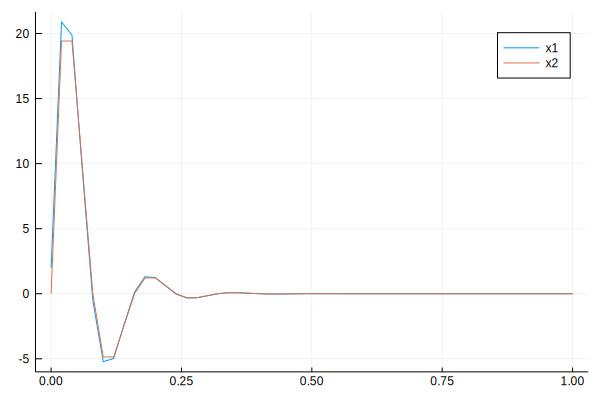

In [27]:
sys_cl(x, p, t) = Acl * x; # Closed-loop dynamical system
x0 = [2.0 ; 0.0]; # Initial values
Tfinal = 1.0; # Final time
tspan = 0:Ts:Tfinal; # Time range

x_sol = zeros(2, length(tspan));
x_sol[:,1] = x0;

for i=1 : length(tspan)-1
    x_sol[:,i+1] = Acl*x_sol[:,i]
end

using Plots
plot(tspan, x_sol[1,:], label="x1")
plot!(tspan, x_sol[2,:], label="x2")
